Import Relevant Libraries

In [2]:
pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 10.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns


Read the Data from the CSV file

In [16]:
df = pd.read_csv("data/train_Data.csv")
print(df["YearBuilt"])
print(df["OverallQual"].max())

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64
10


Data Preprocessing (Dealing with NaN values, converting strings to ints, etc)

In [3]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)


In [12]:
for column in df.columns:
    # Check the number of unique values in the column
    unique_count = df[column].nunique()
    
    # If the number of unique values is 1, remove the column
    if unique_count == 1:
        df.drop(column, axis=1, inplace=True)

In [25]:
column_name = 'Street'
column_type = df[column_name].dtype
print("Data type of column '{}' is: {}".format(column_name, column_type))

KeyError: 'Street'

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

# Select columns with object dtype
object_columns = df.select_dtypes(include=['object'])
label_encoded_df = df

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for column in object_columns:
    label_encoded_df[column] = label_encoder.fit_transform(label_encoded_df[column])

# Now df contains label encoded values for all object dtype columns

In [35]:
label_encoded_df
print("ASdf")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


Conclusion 3: How year built and overall quality are related

First, we converted the numerical data into categorical by placing each data point into their respective bin, which we decided as follows. The YearBuilt column is divided into bins in increments of 20 years, starting from 1860 up to 2020. The OverallQual column is divided into 3 bins, Poor, Average, and Exceptional.

In [33]:
# Define the bins for YearBuilt
year_bins = [1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020]
year_labels = ['1860-1880', '1880-1900', '1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']

# Define the bins for OverallQual
qual_bins = [0, 3, 7, 10]
qual_labels = ['Poor', 'Average', 'Exceptional']

# Create the new columns
df['YearBuiltCategorical'] = pd.cut(df['YearBuilt'], bins=year_bins, labels=year_labels, include_lowest=True)
df['OverallQualCategorical'] = pd.cut(df['OverallQual'], bins=qual_bins, labels=qual_labels, include_lowest=True)

Now that our data is into new columns that are categorical, we can go ahead and create a contingency table of our data and run a Chi-Square test, with the following hypotheses.

Ho: The year a house is built has an effect on whether it is classified as poor, average, or exceptional quality.

Ha: The year a house is built does not have an effect on whether it is classified as poor, average, or exceptional quality.

/var/folders/dq/msc1gwh14g59m1svkdcyzrjh0000gn/T/ipykernel_5172/3290225232.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_category_counts = poor_houses.groupby('YearBuiltCategorical')['OverallQualCategorical'].value_counts()


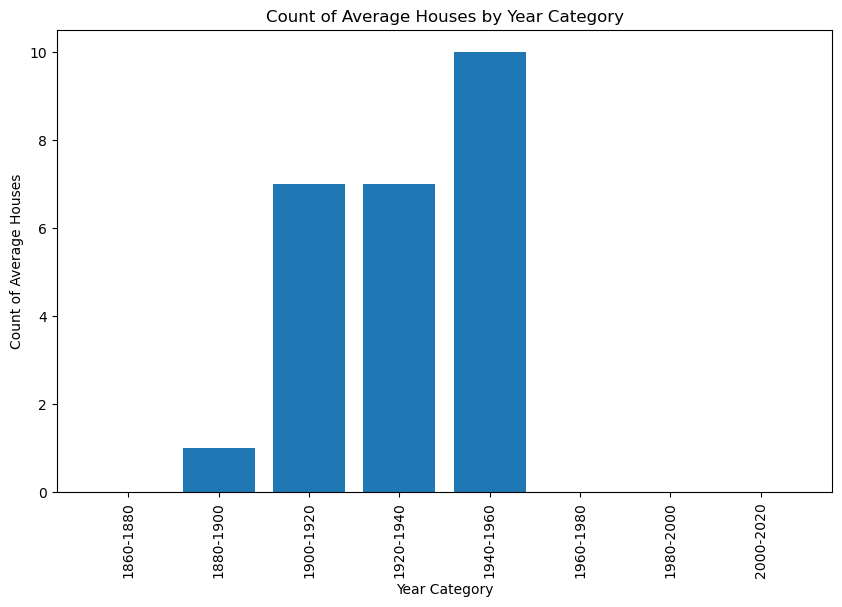

In [40]:
# Filter the dataframe to only include 'Average' quality houses
poor_houses = df[df['OverallQualCategorical'] == 'Poor']

# Group the average houses by the year category and count them
year_category_counts = poor_houses.groupby('YearBuiltCategorical')['OverallQualCategorical'].value_counts()

# Reset the index to make the year categories a column
year_category_counts = year_category_counts.reset_index(name='Count')

# Plot the data using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(year_category_counts['YearBuiltCategorical'], year_category_counts['Count'])
plt.xlabel('Year Category')
plt.ylabel('Count of Average Houses')
plt.title('Count of Average Houses by Year Category')
plt.xticks(rotation=90)
plt.show()

/var/folders/dq/msc1gwh14g59m1svkdcyzrjh0000gn/T/ipykernel_5172/3027195171.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_category_counts = avg_houses.groupby('YearBuiltCategorical')['OverallQualCategorical'].value_counts()


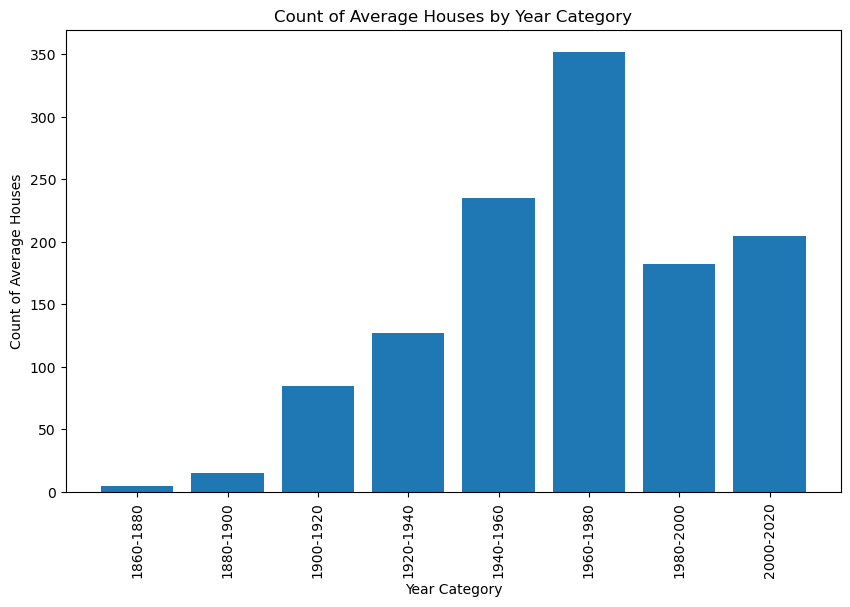

In [41]:
# Filter the dataframe to only include 'Average' quality houses
avg_houses = df[df['OverallQualCategorical'] == 'Average']

# Group the average houses by the year category and count them
year_category_counts = avg_houses.groupby('YearBuiltCategorical')['OverallQualCategorical'].value_counts()

# Reset the index to make the year categories a column
year_category_counts = year_category_counts.reset_index(name='Count')

# Plot the data using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(year_category_counts['YearBuiltCategorical'], year_category_counts['Count'])
plt.xlabel('Year Category')
plt.ylabel('Count of Average Houses')
plt.title('Count of Average Houses by Year Category')
plt.xticks(rotation=90)
plt.show()

/var/folders/dq/msc1gwh14g59m1svkdcyzrjh0000gn/T/ipykernel_5172/2809920899.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_category_counts = exceptional_houses.groupby('YearBuiltCategorical')['OverallQualCategorical'].value_counts()


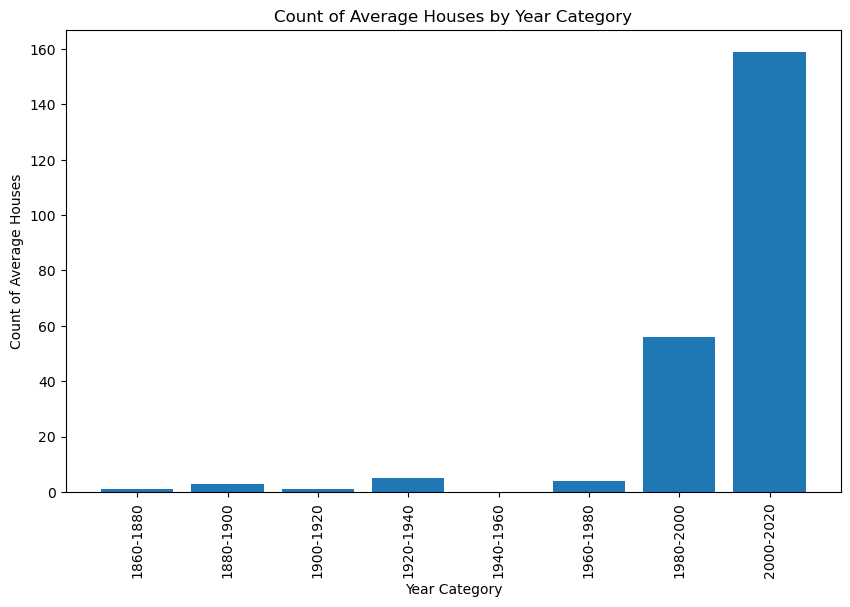

In [39]:
# Filter the dataframe to only include 'Average' quality houses
exceptional_houses = df[df['OverallQualCategorical'] == 'Exceptional']

# Group the average houses by the year category and count them
year_category_counts = exceptional_houses.groupby('YearBuiltCategorical')['OverallQualCategorical'].value_counts()

# Reset the index to make the year categories a column
year_category_counts = year_category_counts.reset_index(name='Count')

# Plot the data using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(year_category_counts['YearBuiltCategorical'], year_category_counts['Count'])
plt.xlabel('Year Category')
plt.ylabel('Count of Average Houses')
plt.title('Count of Average Houses by Year Category')
plt.xticks(rotation=90)
plt.show()

In [44]:
contingency = pd.crosstab(df['OverallQualCategorical'], df['YearBuiltCategorical'])
_, p_value, _, _ = stats.chi2_contingency(contingency)
print("P-Value:", p_value)

P-Value: 4.1338950312699055e-78


Conclusion:

The p-value was calculated to be 4.13e-78, which is well below the decided alpha level of 0.05. We fail to reject the null hypothesis due to overwhelming evidence in support of the fact that the year a house is built has an effect on whether it is classified as poor, average, or exceptional quality. This conclusion is further supported by the graphs shown above of each of the counts of the qualities graphed against the year bins.